Saving ring.jpg to ring (1).jpg


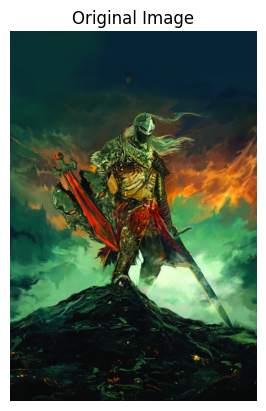

In [32]:
# Import library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files
from google.colab.patches import cv2_imshow  # Fungsi khusus untuk Google Colab

# Fungsi untuk menampilkan gambar dalam format RGB
def show_image(title, img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Upload file gambar yang akan digunakan
uploaded = files.upload()
filename = list(uploaded.keys())[0]
image = cv2.imread(filename)
show_image("Original Image", image)

# extract lines


In [36]:
def extract_lines(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Deteksi tepi dengan Canny Edge Detection
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    show_image("Canny Edges", edges)

    # Deteksi garis dengan Hough Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    # Gambar garis pada gambar asli
    line_img = image.copy()
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    show_image("Hough Transform - Lines Detected", line_img)


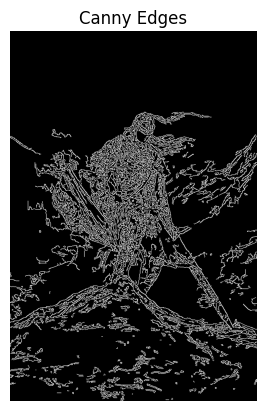

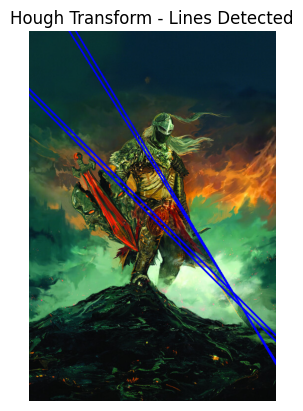

In [37]:
extract_lines(image)

# Template matching for object detection

Unggah gambar utama (tempat objek dicari):


Saving ring.jpg to ring (5).jpg
Unggah gambar template (objek yang dicari):


Saving Screenshot_20241217_104024.png to Screenshot_20241217_104024.png


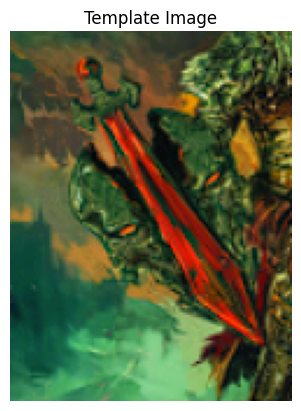

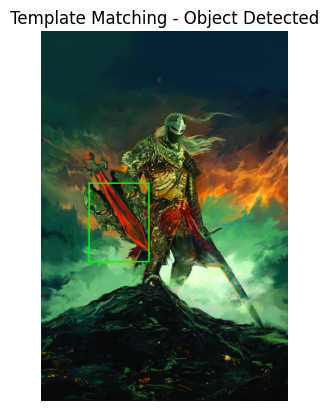

In [55]:
# Template matching for object detection
def template_matching(image, template):
    # Konversi gambar utama ke grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Konversi gambar template ke grayscale
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    # Dapatkan ukuran template (lebar dan tinggi)
    h, w = template.shape[:-1]

    # Template Matching menggunakan metode TM_CCOEFF_NORMED
    result = cv2.matchTemplate(image_gray, template_gray, cv2.TM_CCOEFF_NORMED)

    # Cari lokasi dengan nilai matching tertinggi
    _, _, _, max_loc = cv2.minMaxLoc(result)

    # Gambarkan kotak di lokasi yang terdeteksi
    matched_img = image.copy()
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(matched_img, top_left, bottom_right, (0, 255, 0), 2)

    # Tampilkan hasil deteksi
    show_image("Template Image", template)  # Template (objek yang dicari)
    show_image("Template Matching - Object Detected", matched_img)  # Hasil deteksi

# Upload gambar utama
print("Unggah gambar utama (tempat objek dicari):")
uploaded = files.upload()
filename_main = list(uploaded.keys())[0]
image = cv2.imread(filename_main)

# Unggah gambar template
print("Unggah gambar template (objek yang dicari):")
uploaded_template = files.upload()
filename_template = list(uploaded_template.keys())[0]
template = cv2.imread(filename_template)

# Panggil fungsi template matching
template_matching(image, template)


# Pyramid Gambar

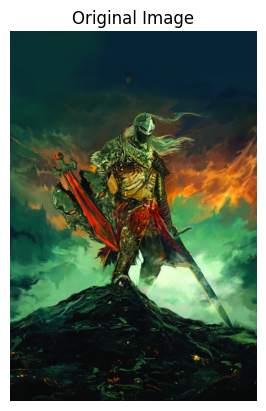

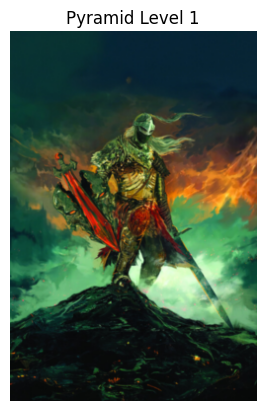

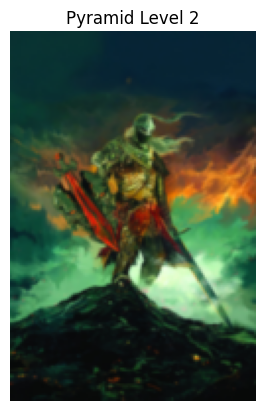

In [57]:
# Fungsi untuk membuat pyramid gambar
def create_image_pyramid(image, levels):
    """
    Membuat pyramid gambar hingga level tertentu.

    Parameters:
        image: np.array
            Gambar input yang akan dibuat pyramid.
        levels: int
            Jumlah level pyramid yang diinginkan.
    """
    pyramid_images = [image]  # Daftar untuk menyimpan gambar setiap level
    current_image = image

    # Loop untuk membuat pyramid hingga level tertentu
    for i in range(levels):
        current_image = cv2.pyrDown(current_image)  # Reduksi ukuran gambar
        pyramid_images.append(current_image)
        show_image(f"Pyramid Level {i+1}", current_image)  # Tampilkan gambar tiap level

    return pyramid_images

# Contoh penggunaan fungsi create_image_pyramid
show_image("Original Image", image)
pyramid_images = create_image_pyramid(image, 2)


# Deteksi Lingkaran dengan Hough Transform

Saving sa.png to sa.png


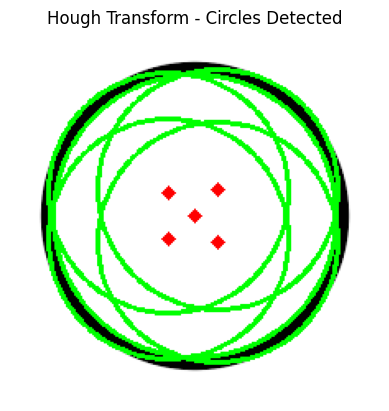

In [73]:
# Upload file gambar yang akan digunakan
uploaded = files.upload()
filename = list(uploaded.keys())[0]
image = cv2.imread(filename)
# Fungsi untuk mendeteksi lingkaran menggunakan Hough Transform
def detect_circles(image):
    """
    Mendeteksi lingkaran pada gambar menggunakan Hough Transform.

    Parameters:
        image: np.array
            Gambar input tempat lingkaran akan dideteksi.
    """
    # Konversi gambar ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)  # Menghaluskan gambar untuk mengurangi noise

    # Deteksi lingkaran menggunakan HoughCircles
    circles = cv2.HoughCircles(
        gray,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=20,
        param1=50,
        param2=30,
        minRadius=0,
        maxRadius=0
    )

    # Jika lingkaran ditemukan, gambarkan pada gambar asli
    output_image = image.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])  # Koordinat pusat lingkaran
            radius = circle[2]  # Radius lingkaran

            # Gambar lingkaran luar
            cv2.circle(output_image, center, radius, (0, 255, 0), 2)

            # Gambar pusat lingkaran
            cv2.circle(output_image, center, 2, (0, 0, 255), 3)

    # Tampilkan gambar hasil deteksi
    show_image("Hough Transform - Circles Detected", output_image)
# Contoh penggunaan fungsi detect_circles
detect_circles(image)

# Ekstraksi Warna Dominan pada Gambar

Saving ring.jpg to ring (6).jpg


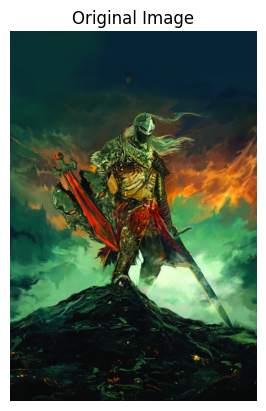

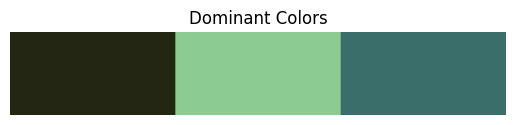

array([[ 18,  38,  35],
       [147, 204, 140],
       [107, 110,  58]])

In [75]:
# Upload file gambar yang akan digunakan
uploaded = files.upload()
filename = list(uploaded.keys())[0]
image = cv2.imread(filename)
show_image("Original Image", image)
# Fungsi untuk ekstraksi warna dominan pada gambar
def extract_dominant_color(image, k=3):
    """
    Mengekstraksi warna dominan dari gambar menggunakan K-Means Clustering.

    Parameters:
        image: np.array
            Gambar input yang akan dianalisis.
        k: int
            Jumlah cluster untuk K-Means (default: 3).
    """
    # Konversi gambar dari BGR ke RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Ubah gambar menjadi array 2D (pixel RGB)
    pixels = image_rgb.reshape((-1, 3))

    # Terapkan K-Means Clustering
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pixels)

    # Warna dominan adalah centroid dari setiap cluster
    dominant_colors = kmeans.cluster_centers_.astype(int)

    # Buat gambar blok warna untuk menampilkan warna dominan
    block = np.zeros((50, 300, 3), dtype=np.uint8)
    step = 300 // k
    for i, color in enumerate(dominant_colors):
        block[:, i * step:(i + 1) * step, :] = color

    # Tampilkan warna dominan
    show_image("Dominant Colors", block)

    return dominant_colors
# Contoh penggunaan fungsi extract_dominant_color
extract_dominant_color(image, k=3)


#  Deteksi Kontur pada Gambar

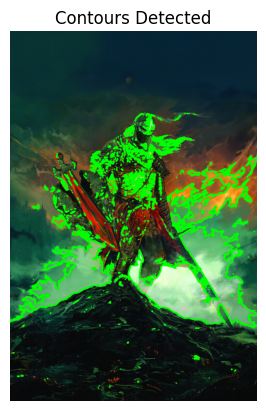

In [77]:
# Fungsi untuk mendeteksi kontur pada gambar
def detect_contours(image):
    """
    Mendeteksi kontur pada gambar menggunakan fungsi findContours dari OpenCV.

    Parameters:
        image: np.array
            Gambar input tempat kontur akan dideteksi.
    """
    # Konversi gambar ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Terapkan threshold untuk membedakan objek dari latar belakang
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Temukan kontur menggunakan fungsi findContours
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Gambar semua kontur pada gambar asli
    output_image = image.copy()
    cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)

    # Tampilkan gambar hasil deteksi kontur
    show_image("Contours Detected", output_image)
# Contoh penggunaan fungsi detect_contours
detect_contours(image)